In [1]:
# This notebook is to demonstrate how to run the Regression Model
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt# library to perform visualization in python
import seaborn as sns
from scipy.stats import norm, lognorm
import warnings
warnings.filterwarnings("ignore")

In [28]:
claims=pd.read_csv(r'C:\Users\avinash\Downloads\allstate-claims-severity\train.csv')
print("claims_dimensiom",claims.shape)

claims_dimensiom (188318, 132)


In [29]:
claims.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
print("number_of_missing_values",claims.isnull().sum().sum())

number_of_missing_values 0


In [6]:
print("skews_in_continous_features:",claims.skew())

skews_in_continous_features: id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [7]:
print(claims.describe())

                  id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

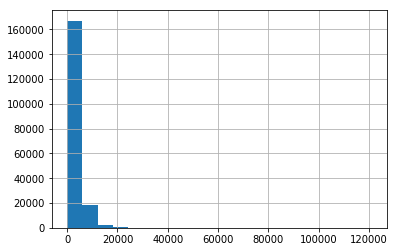

In [30]:
claims['loss'].hist(bins=20)

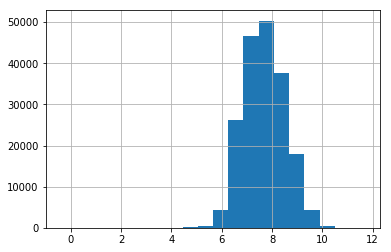

In [9]:
#claims['log_loss']=np.log(claims['loss']).hist(bins=20)

In [35]:
y=claims['loss']# Assigning the target variable to a new variable
claims.drop(columns=['id','loss'],inplace=True) # dropping the target variable from the dataset. Setting the inplace parameter to true will modify the dataset there it self.

In [31]:
claims.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [13]:
#creating list for categorical columns
cat_features=[col for col in claims.columns if claims[col].dtype=="object"]
cat_features

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [14]:
#creating list for numeric cols
num_features=[col for col in claims.columns if claims[col].dtype=="int64" or claims[col].dtype=="float64"]
num_features
claims[num_features].dtypes

cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
dtype: object

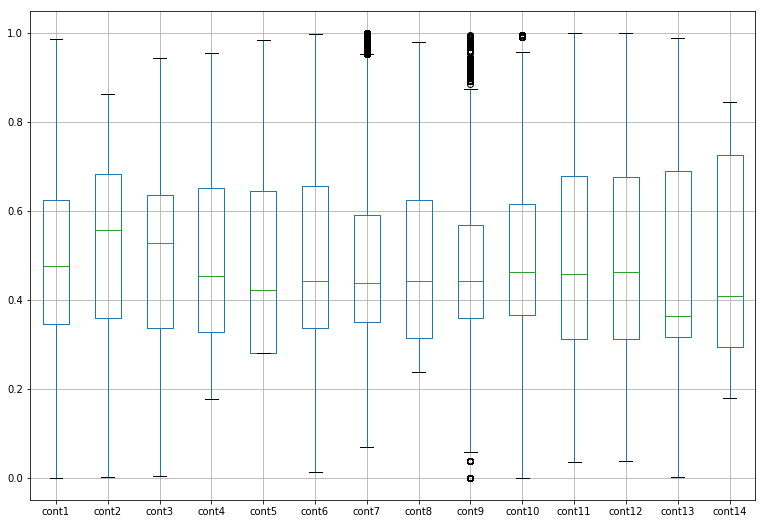

In [15]:
claims[num_features].boxplot(figsize=(13,9))#plotting the numeric cols to check outliers

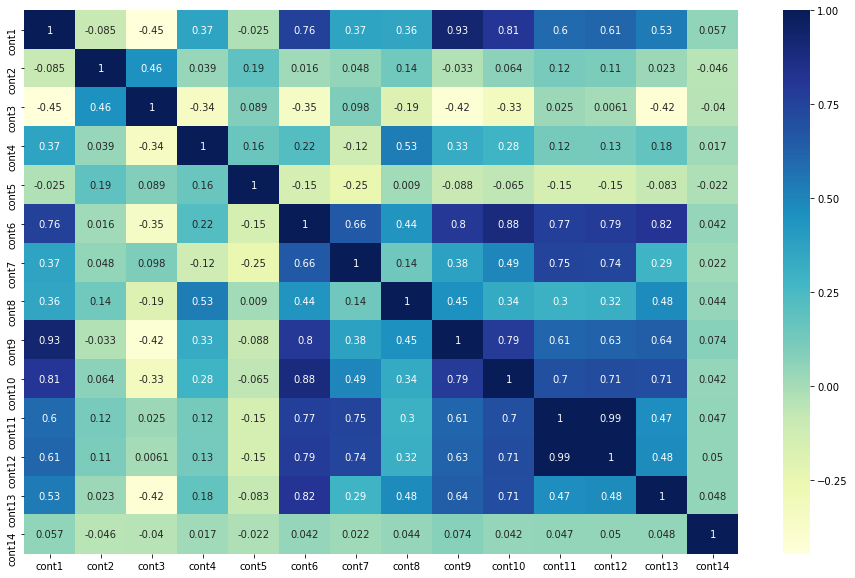

In [16]:
plt.figure(figsize=(16,10))

sns.heatmap(claims[num_features].corr(),annot=True, cmap="YlGnBu")#correlation btw numeric cols

In [17]:
#cols_to_drop=[col for col in claims.columns if len(np.unique(claims[col]==claims[col].shape[0])) or len(np.unique(claims[col]))==1]
#cols_to_drop

In [18]:
print("number_of_unique_features:",len(np.unique(claims.columns)==1))#checking unique cols

number_of_unique_features: 131


In [19]:
print("number_of_unique_categorical:",len(np.unique(claims.columns==claims.columns.shape[0])))

number_of_unique_categorical: 1


In [20]:
ele=[]
for col in claims.columns:
    ele.append(len(np.unique(claims[col]==claims[col].shape[0])))
ele
        

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [36]:
# This command splits the data set into training & testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(claims,y,random_state=42,test_size=0.2)

In [37]:
X_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
78158,A,A,A,A,B,A,A,A,A,A,...,0.281143,0.600404,0.422967,0.24564,0.68961,0.64566,0.245410,0.241676,0.304350,0.211064
178101,A,B,A,A,A,A,A,A,B,A,...,0.752295,0.507409,0.404130,0.55421,0.66201,0.60401,0.644013,0.630853,0.348267,0.356163
19857,A,B,B,A,A,A,A,A,B,B,...,0.783230,0.445589,0.759877,0.44106,0.34365,0.42828,0.596286,0.761665,0.351299,0.766969
47714,A,A,A,B,A,A,A,A,A,A,...,0.405415,0.456654,0.461365,0.36083,0.46853,0.51666,0.496100,0.485119,0.363547,0.294603
80902,B,A,A,B,A,B,A,A,A,A,...,0.281143,0.505057,0.542126,0.72775,0.40455,0.47779,0.418822,0.409777,0.310026,0.386678


In [38]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [39]:
cat_cols=[col for col in X_train.columns if X_train[col].dtypes=="object"]
print("shape_of_cat_cols:",claims[cat_cols].shape)

shape_of_cat_cols: (188318, 116)


In [40]:
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [41]:
# instantiating the model, label is the object
label=LabelEncoderExt()#converting the categorical columns to numerical cols using labelencoderext
for ele in cat_cols:
    label.fit(X_train[ele])
    X_train[ele]=label.transform(X_train[ele])
    X_test[ele]=label.transform(X_test[ele])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()#scaling the numeric cols in feature btw[0,1]

In [43]:
num_cols=[col for col in X_train.columns if X_train[col].dtype=="int64" or X_train[col].dtype=="float64"]

for ele in num_cols:
    X_train[ele]=scaler.fit_transform(np.array(X_train[ele]).reshape(-1,1))
    X_test[ele]=scaler.transform(np.array(X_test[ele]).reshape(-1,1))
    

In [47]:
from sklearn.linear_model import LinearRegression
#Import the metrics to measure the performance of the model,here the problem statement is classification, so we import the Regression problem metrics
from sklearn.metrics import r2_score,mean_squared_error,adjusted_rand_score
# instantiating the model,reg is the object
reg=LinearRegression()
# Training the model on the train data
reg.fit(X_train,y_train)
# Predict on the test data
y_pred=reg.predict(X_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4209431.5906644985
0.48411298248983814


In [48]:
from sklearn.tree import DecisionTreeRegressor
#Import GridSearchCV,RandomizedSearchCV for Hyperparameter Tunning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
tree=DecisionTreeRegressor(random_state=42)
tree
#caratining the parameter to tune the model
parameter={"criterion":["mse"],
            "min_samples_split":[2,3,4,5,6],#here min samples split should be greater than 1 it will raise a error
            "min_samples_leaf":[5,6,7,8,9],
            "max_depth":[5,6,7,8,9]}
rd_cv=RandomizedSearchCV(estimator=tree,param_distributions=parameter,cv=5,n_iter=80)
rd_cv.fit(X_train,y_train)

print(rd_cv.best_params_)

print(rd_cv.best_score_)

{'min_samples_split': 4, 'min_samples_leaf': 8, 'max_depth': 9, 'criterion': 'mse'}
0.45481799262782285


In [49]:
gd_cv=GridSearchCV(estimator=tree,param_grid=parameter,cv=5)
gd_cv.fit(X_train,y_train)
print(gd_cv.best_params_)
print(gd_cv.best_score_)

{'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.45481799262782285


In [51]:
#based on best paramters in gridsearch_cv builting the model
tree=DecisionTreeRegressor(criterion='mse',min_samples_split=4,min_samples_leaf=8,random_state=52,max_depth=9)
tree
tree.fit(X_train,y_train)
y_pred1=tree.predict(X_test)
print(mean_squared_error(y_test,y_pred1))
print(r2_score(y_test,y_pred1))

4277126.180348935
0.4758166699778762


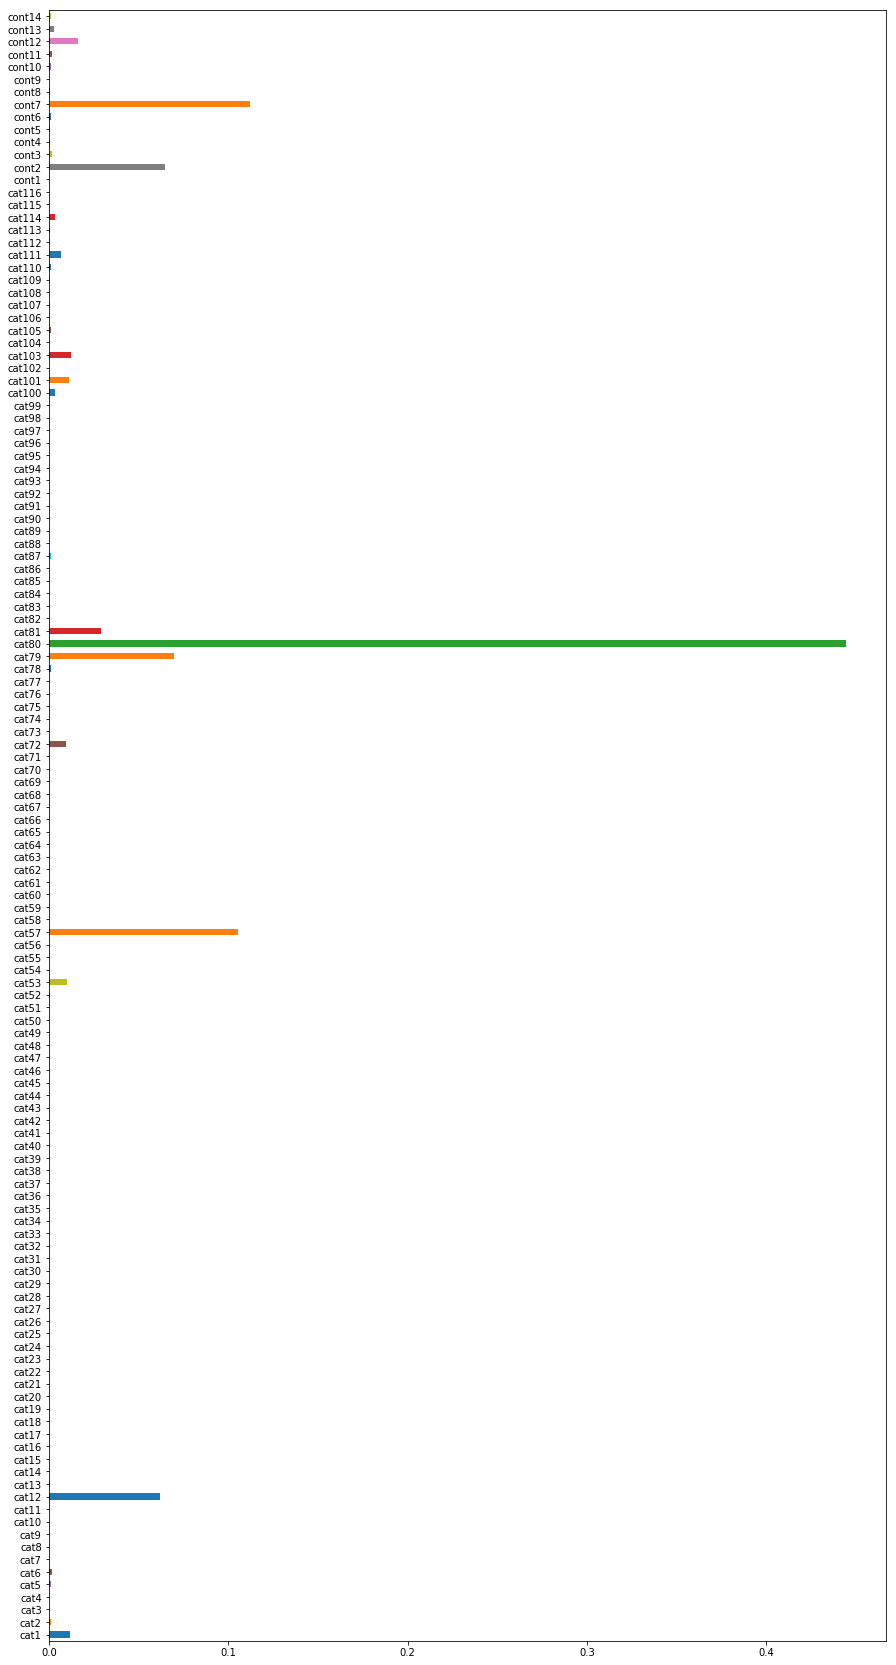

In [54]:
#important features in tree model based on that visualizing.
importances=pd.Series(tree.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(15,30))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor()
parameter={
          "max_depth":[5,6,7,8,9],
          "min_samples_split":[2,3,4,5,6],
          "min_samples_leaf":[5,6,7,8,9],
          "max_leaf_nodes":[5,6,7,8,9],
          "loss":['ls'],
          "n_estimators":[100],
          "learning_rate":[0.1]}
gd_cv=GridSearchCV(estimator=clf,param_grid=parameter,cv=5)
gd_cv.fit(X_train,y_train)
print(gd_cv.best_params_)
print(gd_cv.best_score_)

In [ ]:
clf=GradientBoostingRegressor(learning_rate= 0.1,loss="ls",max_depth=5,max_leaf_nodes=10,min_samples_leaf=8,min_samples_split=6,n_estimators=100)
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)

In [ ]:
print(mean_squared_error(y_test,y_pred2))
print(r2_score(y_test,y_pred2))